In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Preview of Data

In [2]:
iris_data=load_iris()
df=pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target']=iris_data.target
df['species']=df['target'].apply(lambda x: iris_data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

# Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

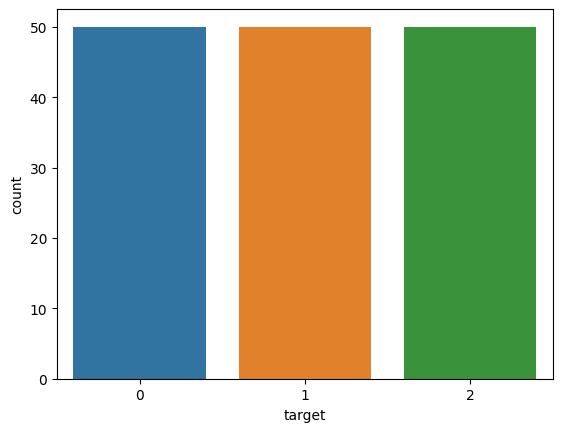

In [8]:
sns.countplot(x='target',data=df)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

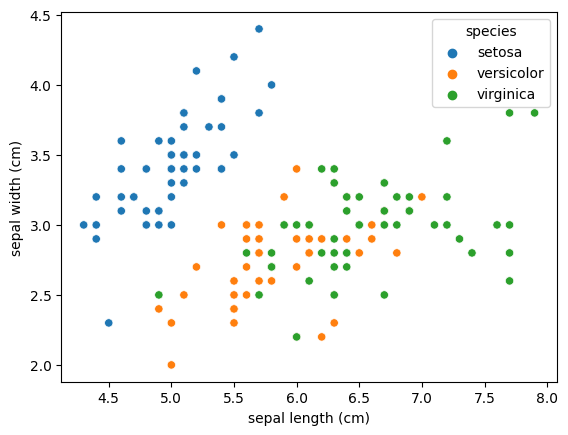

In [9]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='species',data=df)

- Setosa have small sepal lenght and large sepal width
- Versicolor has sepal length between setosa and virginica and sepal width almost equal to Virginica
- Virginica has large sepal length and petal width almost equal to Versicolor

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

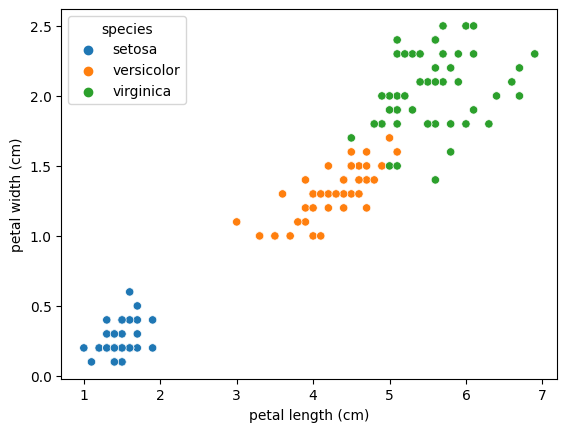

In [10]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='species',data=df)

- Setosa have small petal lenght and petal width
- Versicolor has petal length and petal width between setosa and virginica
- Virginica has large petal length and petal width

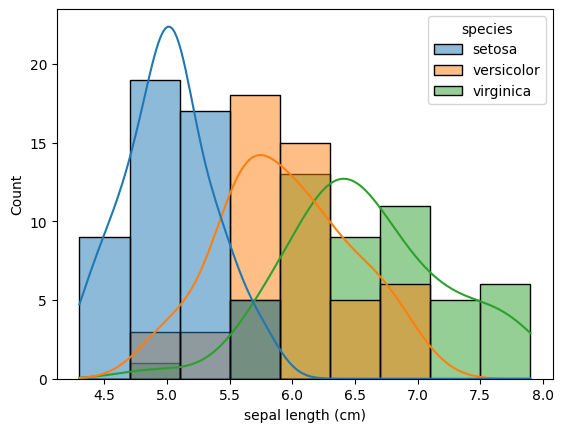

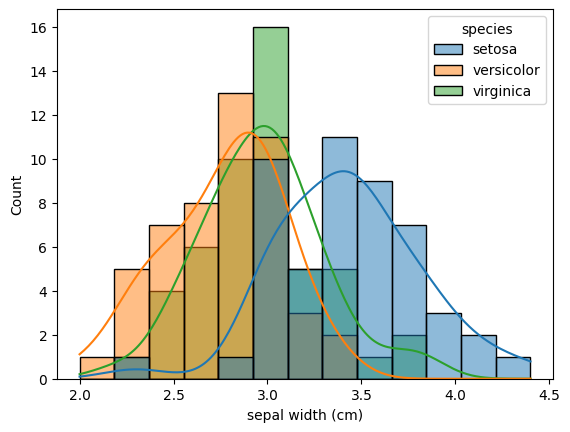

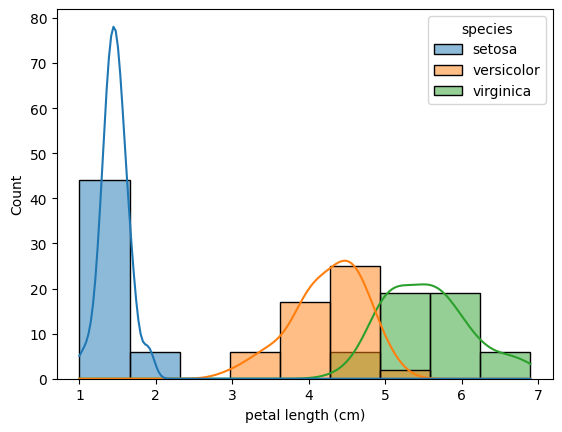

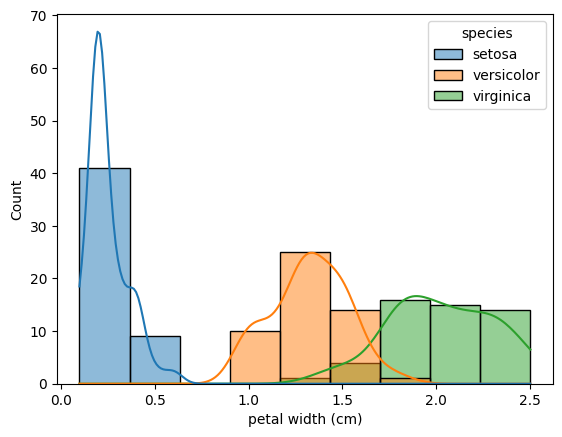

In [11]:
for feature in iris_data.feature_names:
    sns.histplot(x=feature, data=df, kde = True, hue='species')
    plt.show()

- There is high overlap in sepal length and sepal width
- There is low overlap in petal length and petal width

# Correlation

<Axes: >

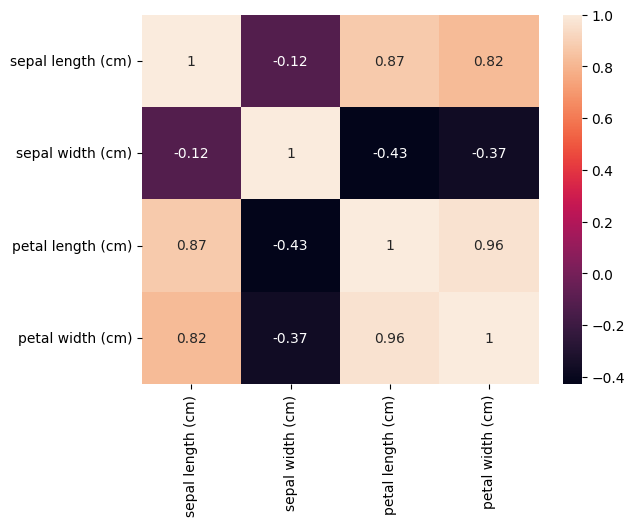

In [12]:
df1=df.drop(['species','target'],axis=1)
sns.heatmap(df1.corr(),annot=True)

# Handling outlier

In [13]:
import numpy as np

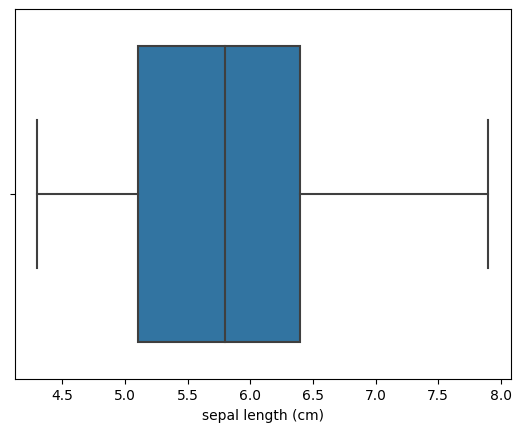

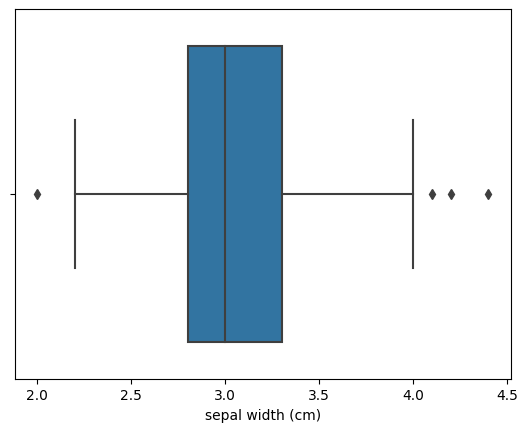

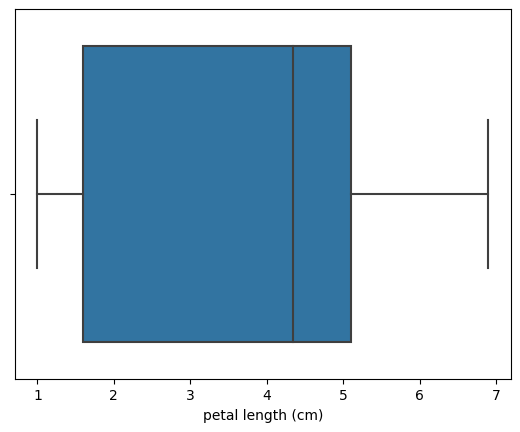

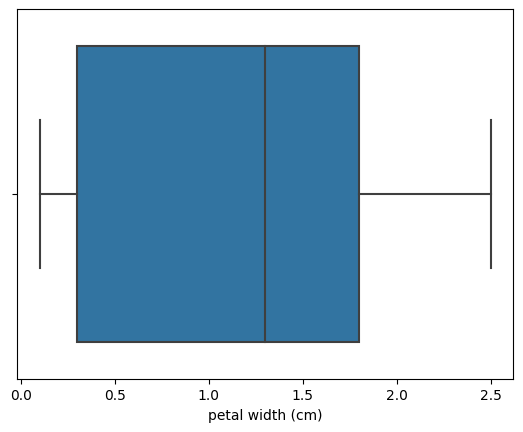

In [14]:
for feature in iris_data.feature_names:
    sns.boxplot(x=feature, data=df)
    plt.show()

There are no outlier in sepal length, petal length and petal width.
But we have some outlier in sepal width

In [15]:
Q1=np.percentile(df['sepal width (cm)'],25)
Q3=np.percentile(df['sepal width (cm)'],75)
IQR=Q3-Q1

upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)

df=df[(df['sepal width (cm)']>lower_limit) & (df['sepal width (cm)']<upper_limit)]

df.shape

(146, 6)

We have removed 4 outliers

# Model Training

In [69]:
from sklearn.model_selection import train_test_split

x=df.drop(['target','species'],axis=1)
y=df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models={
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

In [71]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
from sklearn.metrics import accuracy_score, r2_score  #training and evaluating models
r2score={}
accuracy={}
for model in models:
    models[model].fit(x_train,y_train)
    y_pred=models[model].predict(x_test)
    r2score[model]=r2_score(y_test,y_pred)
    accuracy[model]=accuracy_score(y_test,y_pred)

In [74]:
for model,score in sorted(accuracy.items(),key=lambda x:x[1], reverse=True):
    print('{} : {:.2f}'.format(model,score*100))

Support Vector Machine : 100.00
K-Nearest Neighbors : 97.73
Logistic Regression : 97.73
Random Forest : 97.73
Naive Bayes : 97.73


# Result

We could see that Support Vector Machine has 100% accuracy, while other models have 97% accuracy